# Examine Results

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from convnwb.io import get_files, load_json

from spiketools.plts.data import plot_hist
from spiketools.plts.utils import make_axes

In [2]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [3]:
# Set which task to run
task = 'THO'

In [4]:
# Set the folder to load results from
base_path = Path('../results/units/')
data_path = base_path / task

In [5]:
# Get the list of files
res_files = get_files(data_path, select='json')

In [6]:
# Check the number of available files
n_files = len(res_files)

## Load Example File

In [7]:
# Load an example file
file = res_files[0]
data = load_json(file, folder=str(data_path))

In [8]:
# Check example file
data

{'session': 'THO_wv001_session_0',
 'uid': 0,
 'wvID': 1,
 'keep': True,
 'cluster': 5169,
 'channel': 'A10',
 'location': 'LAH',
 'n_spikes': 595,
 'firing_rate': 0.4031300246544839,
 'fr_t_val_all': 0.0961735036787835,
 'fr_p_val_all': 0.9235853647300167,
 'fr_t_val_empt': -0.6271032028034079,
 'fr_p_val_empt': 0.5346613282915866,
 'fr_t_val_full': 0.6076277761862037,
 'fr_p_val_full': 0.545766122653963,
 'place_info': 1.320879435006318,
 'place_p_val': 0.816,
 'place_z_score': -0.8725235092697694,
 'target_info': 0.5613856765708625,
 'target_p_val': 0.302,
 'target_z_score': 0.44216001099834257,
 'sp_p_val_0': 0.678,
 'sp_p_val_1': 0.612,
 'sp_p_val_2': 0.196,
 'sp_p_val_3': 0.82,
 'sp_z_score_0': -0.5068916523558201,
 'sp_z_score_1': -0.29865502103879604,
 'sp_z_score_2': 0.8379074552561443,
 'sp_z_score_3': -0.9260815441275602}

## Collect Results

In [9]:
# Collect all unit results together into a dataframe
all_results = pd.DataFrame()
for file in res_files:
    cur_results = load_json(file, folder=data_path)
    all_results = all_results.append(cur_results, ignore_index=True)

In [10]:
# Clean up some datatypes - cast integers
set_ints = ['uid', 'wvID', 'keep', 'cluster', 'n_spikes']
all_results[set_ints] = all_results[set_ints].astype('int')

In [11]:
# Check the columns
all_results.columns

Index(['session', 'uid', 'wvID', 'keep', 'cluster', 'channel', 'location',
       'n_spikes', 'firing_rate', 'fr_t_val_all', 'fr_p_val_all',
       'fr_t_val_empt', 'fr_p_val_empt', 'fr_t_val_full', 'fr_p_val_full',
       'place_info', 'place_p_val', 'place_z_score', 'target_info',
       'target_p_val', 'target_z_score', 'sp_p_val_0', 'sp_p_val_1',
       'sp_p_val_2', 'sp_p_val_3', 'sp_z_score_0', 'sp_z_score_1',
       'sp_z_score_2', 'sp_z_score_3'],
      dtype='object')

In [12]:
# Check the head of the results
all_results.head()

,session,uid,wvID,keep,cluster,channel,location,n_spikes,firing_rate,fr_t_val_all,...,target_p_val,target_z_score,sp_p_val_0,sp_p_val_1,sp_p_val_2,sp_p_val_3,sp_z_score_0,sp_z_score_1,sp_z_score_2,sp_z_score_3
0,THO_wv001_session_0,0,1,1,5169,A10,LAH,595,0.403130,0.096174,...,0.302,0.442160,0.678,0.612,0.196,0.820,-0.506892,-0.298655,0.837907,-0.926082
1,THO_wv001_session_0,2,3,1,5200,A10,LAH,22559,15.211009,0.532078,...,0.550,-0.165489,0.618,0.420,0.638,0.356,-0.244624,0.201325,-0.307028,0.367370
2,THO_wv001_session_0,3,4,1,5203,A10,LAH,4583,3.092074,1.323994,...,0.494,0.054754,0.202,0.680,0.290,0.658,0.895174,-0.480168,0.585059,-0.446647
3,THO_wv001_session_0,4,5,1,2248,A12,LAH,990,0.673605,0.000000,...,0.626,-0.363051,0.820,0.230,0.440,0.432,-0.925193,0.714770,0.182159,0.188107
4,THO_wv001_session_0,5,6,1,2303,A12,LAH,5965,4.031982,-1.315754,...,0.846,-1.047380,0.570,0.626,0.548,0.494,-0.148099,-0.329891,-0.172912,-0.039285


### Location Checks

In [13]:
set(all_results['location'])

{'LA', 'LAH', 'LPH', 'RA', 'RAH', 'RPH'}

### Firing Rate Checks

In [14]:
# Add a marker for firing rate threshold in our task
all_results['fr_keep_th'] = (all_results['firing_rate'] < 0.5).values

### Binary labels

In [15]:
# Set significance level
ALPHA_LEVEL = 0.05

In [16]:
# Add binary labels for statistical tests
all_results['is_chest_cell'] = all_results['fr_p_val_all'] < ALPHA_LEVEL
all_results['is_full_cell'] = all_results['fr_p_val_full'] < ALPHA_LEVEL
all_results['is_empty_cell'] = all_results['fr_p_val_empt'] < ALPHA_LEVEL
all_results['is_place_cell'] = all_results['place_p_val'] < ALPHA_LEVEL
all_results['is_target_cell'] = all_results['target_p_val'] < ALPHA_LEVEL
all_results['is_sp_cell'] = np.logical_or.reduce((all_results['sp_p_val_0'] < ALPHA_LEVEL,
                                                  all_results['sp_p_val_1'] < ALPHA_LEVEL,
                                                  all_results['sp_p_val_2'] < ALPHA_LEVEL,
                                                  all_results['sp_p_val_3'] < ALPHA_LEVEL))
#all_results['is_head_direction_cell'] = all_results['hd_p_val'] < ALPHA_LEVEL

### Check numbers

In [17]:
# Check the total number of cells
print('Total number of cells: {}'.format(n_files))

Total number of cells: 456


## Check Results

In [18]:
n_cells = len(all_results)

In [19]:
n_chest_cells = sum(all_results['is_chest_cell'])
n_full_cells = sum(all_results['is_full_cell'])
n_empty_cells = sum(all_results['is_empty_cell'])
n_place_cells = sum(all_results['is_place_cell'])
n_target_cells = sum(all_results['is_target_cell'])
n_sp_cells = sum(all_results['is_sp_cell'])

In [20]:
print('{} - total cells: {}\n'.format(task, n_cells))
print('# chest cells: \t\t{:2d} ({:1.2f})'.format(n_chest_cells, n_chest_cells / n_cells))
print('# full cells:  \t\t{:2d} ({:1.2f})'.format(n_full_cells, n_full_cells / n_cells))
print('# empty cells: \t\t{:2d} ({:1.2f})'.format(n_empty_cells, n_empty_cells / n_cells))
print('# place cells: \t\t{:2d} ({:1.2f})'.format(n_place_cells, n_place_cells / n_cells))
print('# target cells:\t\t{:2d} ({:1.2f})'.format(n_target_cells, n_target_cells / n_cells))
print('# sp cells:\t\t{:2d} ({:1.2f})'.format(n_sp_cells, n_sp_cells / n_cells))

THO - total cells: 456

# chest cells: 		60 (0.13)
# full cells:  		53 (0.12)
# empty cells: 		36 (0.08)
# place cells: 		 8 (0.02)
# target cells:		14 (0.03)
# sp cells:		11 (0.02)


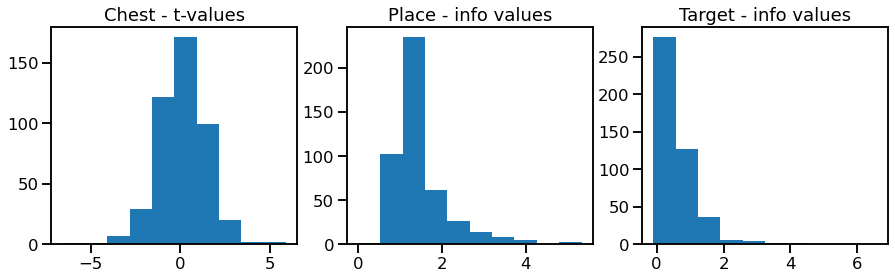

In [21]:
# Plot the distributions of measured values
axes = make_axes(3, 3, figsize=(15, 4))
plot_hist(all_results.fr_t_val_all.values, title='Chest - t-values', ax=axes[0])
plot_hist(all_results.place_info.values, title='Place - info values', ax=axes[1])
plot_hist(all_results.target_info.values, title='Target - info values', ax=axes[2])

## Save out results

In [22]:
# Save out of CSV
all_results.to_csv(task + '_all_results.csv')